<a href="https://colab.research.google.com/github/gabiteixeira09/Bibliotecabackend/blob/main/Atividade1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
iris = load_iris()
X = iris.data
y = iris.target

In [18]:
#70% treino, 30% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [19]:
param_grid = {'n_neighbors': np.arange(1, 31)}

In [20]:
knn = KNeighborsClassifier()

In [60]:
#testar os valores de k
#cv=dividir o conjunto de dados em várias partes para garantir que o modelo seja testado e avaliado de forma robusta para melhorar a avaliação do modelo, reduzindo a dependência em apenas uma divisão de treino/teste.
#dataset Iris é relativamente pequeno, então a forma como ele é dividido pode impactar significativamente os resultados. Com cv=5, as divisões não capturaram tão bem as nuances dos dados como aconteceu com um número maior de folds, como cv=8.
grid_search = GridSearchCV(knn, param_grid, cv=8, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=8, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             scoring='accuracy')

In [50]:
print(f"Melhor valor de k: {grid_search.best_params_}")
print(f"Melhor acurácia: {grid_search.best_score_}")


Melhor valor de k: {'n_neighbors': 3}
Melhor acurácia: 0.9429945054945056


In [61]:
#prever os resultados no conjunto de teste usando o melhor K
y_pred = grid_search.predict(X_test)

In [52]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [53]:
print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1-score: 1.0


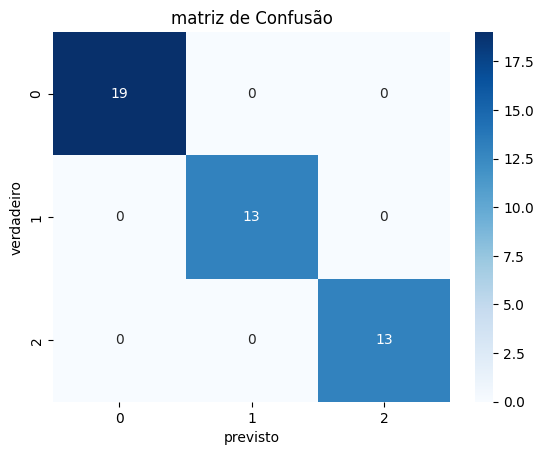

In [62]:
#matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("matriz de Confusão")
plt.xlabel("previsto")
plt.ylabel("verdadeiro")
plt.show()

In [55]:
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [56]:
#acurácia para cada valor de k
results = pd.DataFrame(grid_search.cv_results_)
k_values = np.arange(1, 31)
accuracies = results['mean_test_score']

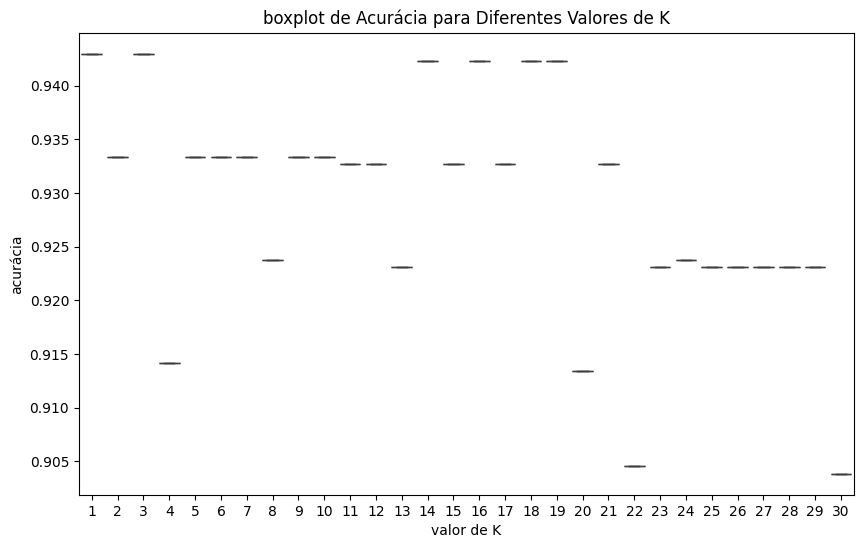

In [57]:
#boxplot da acurácia para cada valor de k
plt.figure(figsize=(10, 6))
sns.boxplot(x=k_values, y=accuracies)
plt.title('boxplot de Acurácia para Diferentes Valores de K')
plt.xlabel('valor de K')
plt.ylabel('acurácia')
plt.show()

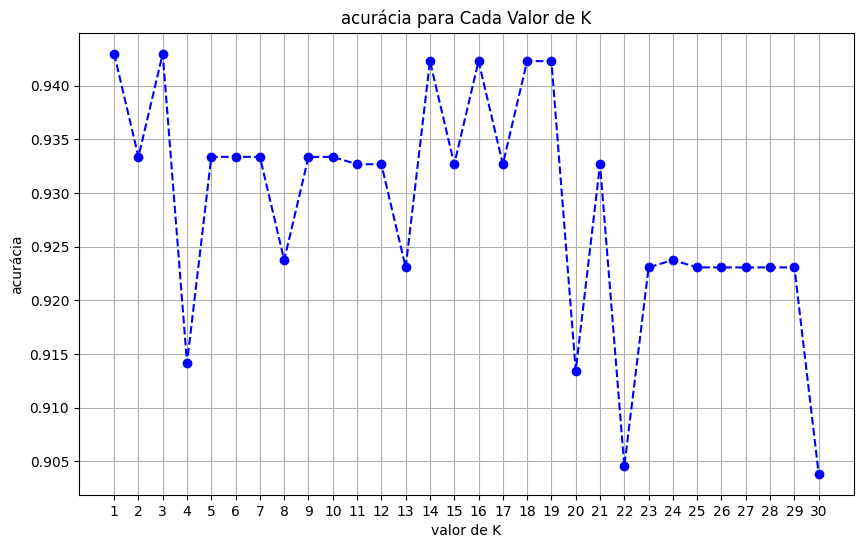

In [58]:
#gráfico da acurácia para cada valor de K
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.title('acurácia para Cada Valor de K')
plt.xlabel('valor de K')
plt.ylabel('acurácia')
plt.xticks(k_values)
plt.grid(True)
plt.show()